In [1]:
import pandas as pd

data = pd.read_csv("C:/Users/kekli/Desktop/ML_data/musteriler.csv")
veri =data.copy()
veri

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
veri= veri.drop(columns="CustomerID",axis=1)
veri

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
veri.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
veri.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [7]:
X= veri.iloc[:,1:3]
X

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns  

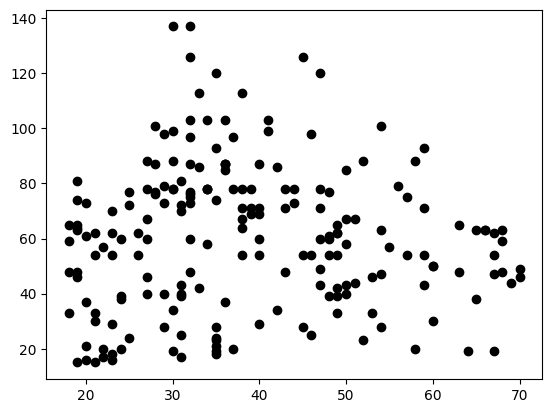

In [9]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],color="black")
plt.show()

In [12]:
from sklearn.cluster import KMeans
#modelimizi kurmuş olduk. 4 tane kümeleme işleme yapıcak 
kmodel = KMeans(n_clusters=4,random_state=0)
kmodel.fit(X)
#modelimizde merkez noktalarının koordinatlarını görmek için
print(kmodel.cluster_centers_)


[[ 39.         106.5       ]
 [ 55.81481481  51.77777778]
 [ 30.34693878  29.26530612]
 [ 31.95890411  72.95890411]]


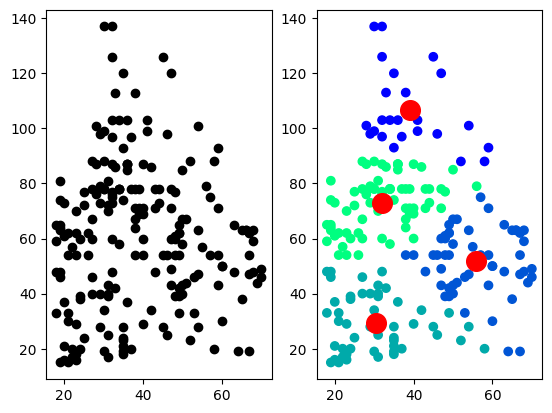

In [13]:
kfit = kmodel.fit(X)
kumeler = kfit.labels_
merkezler=kfit.cluster_centers_

figure,axis=plt.subplots(1,2)
axis[0].scatter(X.iloc[:,0],X.iloc[:,1],color="black")
axis[1].scatter(X.iloc[:,0],X.iloc[:,1],c=kumeler,cmap="winter")
axis[1].scatter(merkezler[:,0],merkezler[:,1],c="red",s=200)
plt.show()

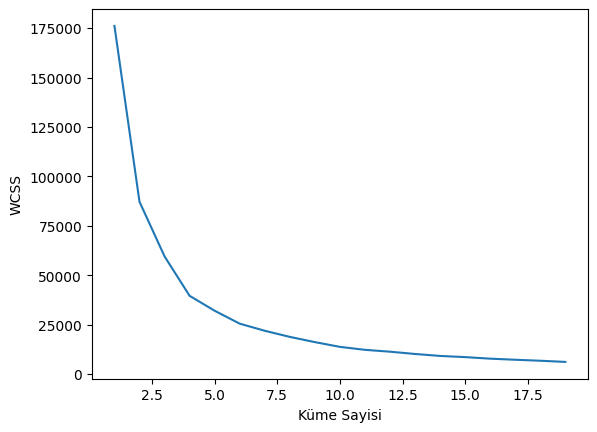

In [14]:
wcss=[]

for k in range(1,20):
    kmodel = KMeans(n_clusters=k,random_state=0)
    kmodel.fit(X)
    wcss.append(kmodel.inertia_)
plt.plot(range(1,20),wcss)
plt.xlabel("Küme Sayisi")
plt.ylabel("WCSS")
plt.show()  

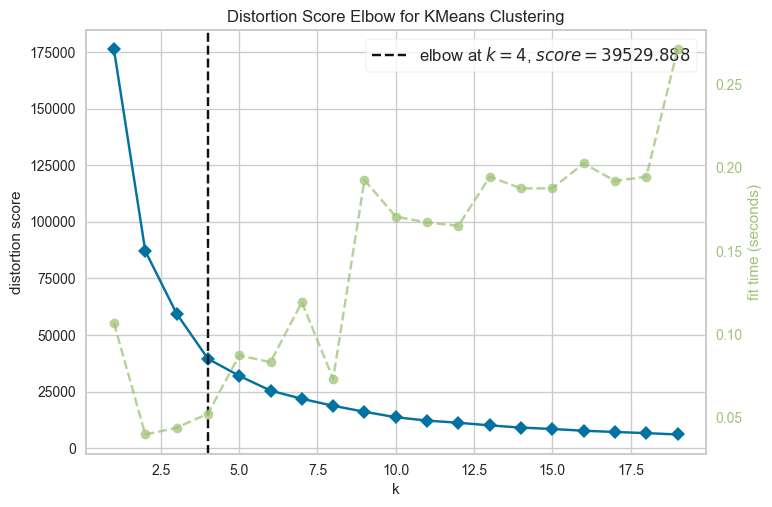

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer

kmodel=KMeans(random_state=0)
grafik=KElbowVisualizer(kmodel,k=(1,20))
grafik.fit(X)
grafik.poof()